## Dice problem

<img src="images/dice_in_a_bag.png" style="width: 400px; height: 400px;">

Suppose I have a box of dice that contains:
* 4-sided die
* 6-sided die
* 8-sided die
* 12-sided die
* 20-sided die.

Suppose I select a die from the box at random, roll it, and get a 6. What is
the probability that I rolled the 6-sided dice?

\begin{equation*}
P(D6 | 6) = \frac{P(6 | D6) P(D6)}{P(6)}
\end{equation*}

* `P(6 | D6) = 1/6`
* `P(D6) = 1/5`
* `P(6) = P(6|D4) P(D4) + P(6|D6) P(D6) + P(6|D8) P(D8) + P(6|D12) P(D12) + P(6|D20) P(D20)`
    - `= 0*(1/5) + (1/6)*(1/5) + (1/8)*(1/5) + (1/12)*(1/5) + (1/20)*(1/5) = 0.085`

\begin{equation*}
P(D6 | 6) = \frac{(1/6) (1/5)}{0.085} = 0.392
\end{equation*}

### Now let's write a program to calculate these faster

In [1]:
dice_sides = [4, 6, 8, 12, 20]
dice_prior = [1/5 for i in dice_sides]
number_rolled = 6

def prob_side(side, num_sides):
    if side <= num_sides:
        return 1 / num_sides
    else:
        # There is a 0% chance that a six-sided dice will roll a 7
        return 0

likelihood = dice_prior[:]
for index, dice in enumerate(dice_sides):
    likelihood[index] = likelihood[index] * prob_side(number_rolled, dice)


# Normalize - divide each by probability of rolling a 6 in a single roll of any dice
normalizing_constant = sum([(1/5) * prob_side(6, dice) for dice in dice_sides])

for index, dice in enumerate(dice_sides):
    likelihood[index] = likelihood[index] / normalizing_constant

dice_posterior = likelihood
print(dice_posterior)

[0.0, 0.3921568627450981, 0.2941176470588236, 0.19607843137254904, 0.11764705882352945]


### As a sanity check, we can make sure the probabilities add up to 1.

In [2]:
sum(dice_posterior)

1.0000000000000002

### Let's graph it

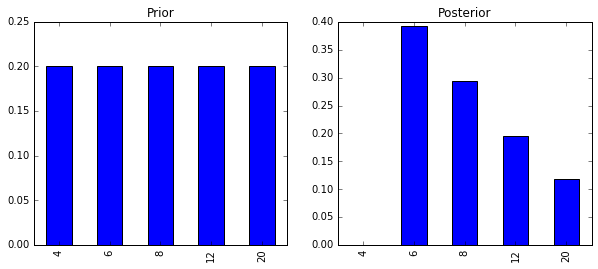

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import functools
%matplotlib inline

ys = [dice_prior, dice_posterior]
x_ax = dice_sides

fig, axs = plt.subplots(ncols=2, figsize=(10, 4))
for i, y_ax in enumerate(ys):
    pd.Series(y_ax, index=x_ax).plot(kind='bar', ax=axs[i])
    if i == 0:
        axs[i].set_title('Prior')
    else:
        axs[i].set_title('Posterior')

## Generalize

In order to do more calculations easier, let's write a more general way to do the calculations.

In [4]:
def dice_prob_side(side, num_sides):
    if side <= num_sides:
        return 1 / num_sides
    else:
        # There is a 0% chance that a six-sided dice will roll a 7
        return 0

def make_dice_hypothesis(sides):
    def hypo(roll):
        return dice_prob_side(roll, sides)
    return hypo
    
dice_sides_list = [4, 6, 8, 12, 20]
hypothesis_suite = [make_dice_hypothesis(dice_sides) for dice_sides in dice_sides_list]
dice_prior = [1/len(dice_sides_list) for i in dice_sides_list]

def update_belief_for_evidence(hypothesis_suite, prior, new_evidence):
    norm_const = sum([prior[i] * hypothesis_suite[i](new_evidence) for i in range(len(hypothesis_suite))])
    return [(prior[i]*hypothesis_suite[i](new_evidence)) / norm_const for i in range(len(hypothesis_suite))]

update_belief_for_evidence(hypothesis_suite, dice_prior, 6)

[0.0,
 0.3921568627450981,
 0.2941176470588236,
 0.19607843137254904,
 0.11764705882352945]

### Let's see if it works...

In [9]:
# Consider 8 pieces of evidence
evidence_series = [6, 6, 8, 7, 7, 5, 4, 13]
functools.reduce(lambda pri, e: update_belief_for_evidence(hypothesis_suite, pri, e), evidence_series, [1/5]*5)

[0.0, 0.0, 0.0, 0.0, 1.0]

## Graph updated beliefs over multiple pieces of evidence

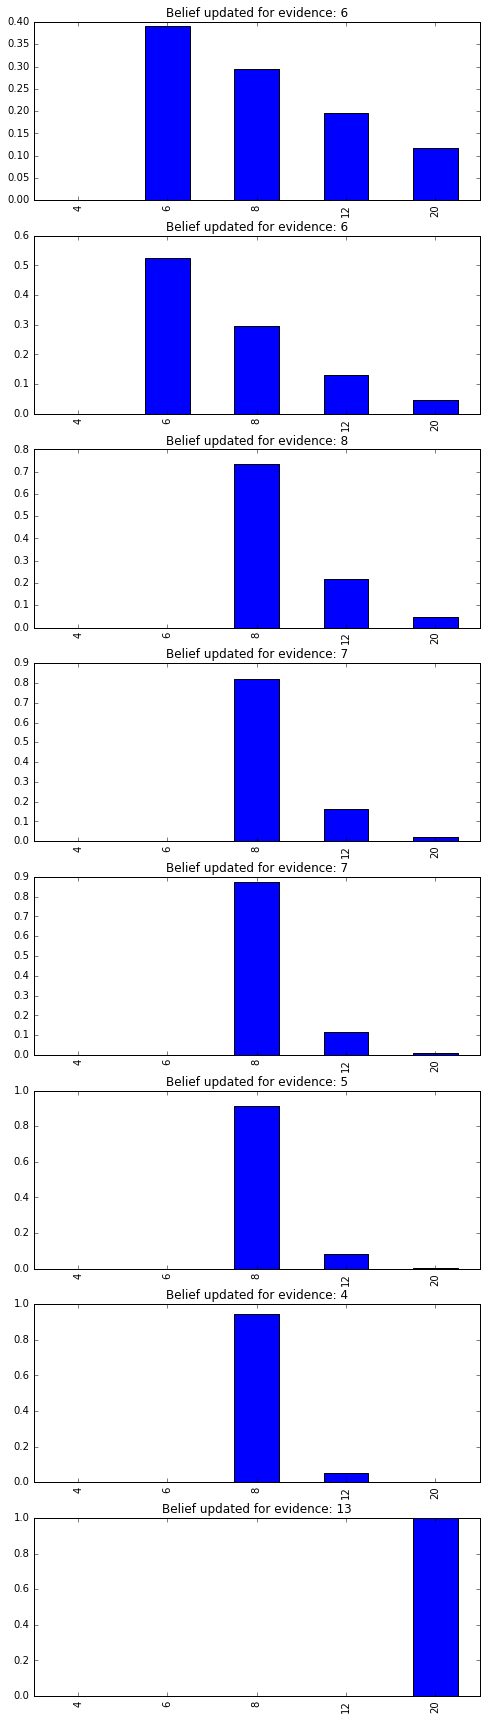

In [8]:
ys = [dice_prior, dice_posterior]
x_ax = dice_sides
belief = [1/5]*5

fig, axs = plt.subplots(ncols=1, nrows=8, figsize=(8, 30))
for i, evidence in enumerate(evidence_series):
    belief = update_belief_for_evidence(hypothesis_suite, belief, evidence)
    pd.Series(belief, index=x_ax).plot(kind='bar', ax=axs[i])
    axs[i].set_title('Belief updated for evidence: {}'.format(evidence))

Interestingly, the last "13" roll demonstrates the truth of the saying *"When you have eliminated the impossible, whatever remains, however improbable, must be the truth?"* (Sherlock Holmes/Sir Arthur Conan Doyle).

<img src="images/sherlock.jpg" style="height: 371px; width: 660px;">
